# Import the libraries

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical data

In [2]:
# Get the wikipedia table for the S&P500
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

# Replace any symbols that contain the character "." with a "-"
table["Symbol"].replace(to_replace=r"[.]", value="-", regex=True, inplace=True)

# Convert the wikipedia table into a pandas dataframe
sector_ticker = [table["GICS Sub-Industry"].values, table["Symbol"].values]
columns = pd.MultiIndex.from_arrays(sector_ticker)
sp_500 = pd.DataFrame(columns=columns)

# Get the historical price data and add to pandas dataframe
num = 1
for sector in sp_500.columns.levels[0]:
    for ticker in sp_500[sector]:
        try:
            data = yf.Ticker(ticker).history(period="5y", interval="1d")["Close"]
            sp_500.loc[:, (sector, ticker)] = data
        except:
            pass
        print(f"({num}/{len(sp_500.columns.levels[1])}) {sector}: {ticker}" + " " * 100, end="\r")
        num += 1

sp_500

,Industrial Conglomerates,Health Care Equipment,Pharmaceuticals,Health Care Equipment,IT Consulting & Other Services,Interactive Home Entertainment,Application Software,Semiconductors,Automotive Retail,Independent Power Producers & Energy Traders,...,Casinos & Gaming,Multi-Utilities,"Technology Hardware, Storage & Peripherals",Semiconductors,Industrial Machinery,Restaurants,Electronic Equipment & Instruments,Health Care Equipment,Regional Banks,Pharmaceuticals
,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-14,139.754059,36.801006,45.151936,88.209999,97.195572,31.329500,87.010002,2.720000,157.040115,9.114859,...,77.679916,34.824303,23.064705,42.924034,35.741375,50.870022,65.830002,100.890724,22.283026,39.972862
2016-03-15,140.272293,36.255814,43.897053,87.339996,97.881187,31.397161,86.830002,2.490000,156.291107,9.123175,...,75.884224,34.893242,22.999365,42.978844,35.807087,51.316086,63.419998,100.179993,22.283026,39.401955
2016-03-16,140.686890,36.510231,44.441628,85.669998,98.356575,31.696833,88.169998,2.630000,156.724930,9.472469,...,78.664360,35.255085,23.064705,43.517673,36.267128,51.591587,65.580002,100.131966,22.256098,39.150364
2016-03-17,141.429657,36.610191,43.660297,85.570000,99.243340,31.513159,89.959999,2.800000,155.719254,9.588896,...,80.943176,35.754791,23.304277,42.960579,36.623878,51.683422,66.040001,99.488480,22.444559,38.434326
2016-03-18,142.794281,37.064514,44.646828,87.529999,98.521133,31.126499,93.419998,2.930000,155.255905,9.663745,...,85.701317,35.375710,23.434963,43.353279,37.055740,51.368561,67.790001,100.372070,22.624044,39.537426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,183.770004,115.629997,106.110001,285.920013,249.389999,89.209999,421.200012,73.959999,176.500000,26.280001,...,133.740005,61.501259,26.700001,112.089996,100.919998,104.139999,460.640015,156.500000,57.619999,145.149994
2021-03-09,181.179993,116.699997,106.790001,296.799988,254.369995,92.500000,439.179993,78.529999,173.050003,27.530001,...,134.000000,61.689857,26.510000,120.279999,100.010002,102.680000,468.350006,156.660004,56.450001,150.139999


# Normalize data and group into sub-industries

In [3]:
df = pd.DataFrame()
for sector in sp_500.columns.levels[0]:
    data = (sp_500[sector] - sp_500[sector].min()) / (sp_500[sector].max() - sp_500[sector].min())
    data = data.sum(axis=1)
    df[sector] = data
df

,Advertising,Aerospace & Defense,Agricultural & Farm Machinery,Agricultural Products,Air Freight & Logistics,Airlines,Alternative Carriers,Apparel Retail,"Apparel, Accessories & Luxury Goods",Application Software,...,Steel,Systems Software,Technology Distributors,"Technology Hardware, Storage & Peripherals",Thrifts & Mortgage Finance,Tobacco,Trading Companies & Distributors,Trucking,Water Utilities,Wireless Telecommunication Services
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-14,0.961383,1.088669,0.016627,0.099501,0.383025,2.897208,0.957431,1.893222,3.568957,0.141801,...,0.271975,0.026877,0.018528,0.919369,0.371018,0.948605,0.007926,0.088351,0.007548,0.003256
2016-03-15,0.952884,1.034014,0.013018,0.095257,0.397864,2.870651,0.925879,1.885692,3.533385,0.132173,...,0.269945,0.024945,0.021516,0.883390,0.369444,0.945162,0.006118,0.083043,0.012726,0.000000
2016-03-16,0.981064,1.140662,0.015304,0.120720,0.404361,2.924975,0.968449,1.876093,3.503803,0.199679,...,0.278877,0.034074,0.020993,0.930862,0.366297,0.963183,0.014659,0.091983,0.015446,0.004171
2016-03-17,1.007104,1.231643,0.020266,0.141656,0.526592,2.911430,0.924878,1.908090,3.612691,0.224651,...,0.302425,0.036914,0.019126,0.952643,0.374165,0.999835,0.020853,0.119585,0.024837,0.003968
2016-03-18,1.016713,1.314442,0.018973,0.137978,0.554192,3.023902,0.944911,1.955596,3.635220,0.269453,...,0.303440,0.028521,0.022114,1.052053,0.380458,0.968681,0.019084,0.144762,0.007636,0.001628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,1.865482,7.410201,0.947457,0.972530,3.263232,2.900462,0.513873,3.411226,5.352916,9.142547,...,0.920082,2.532875,0.944765,5.272766,0.961695,1.222608,0.941287,1.884268,0.700086,0.918608
2021-03-09,1.810752,7.187389,0.944096,0.980142,3.378691,2.833495,0.477478,3.488736,5.192442,9.534993,...,0.908059,2.670944,0.939448,5.376280,0.893925,1.262553,0.913008,1.925157,0.728594,0.910978
2021-03-10,1.881341,7.506433,0.972481,0.993381,3.431828,2.829783,0.479905,3.477213,5.190791,9.465441,...,0.945778,2.665330,0.955082,5.395302,0.934194,1.270962,0.943057,1.894563,0.724260,0.922169


# Display the correlation matrix

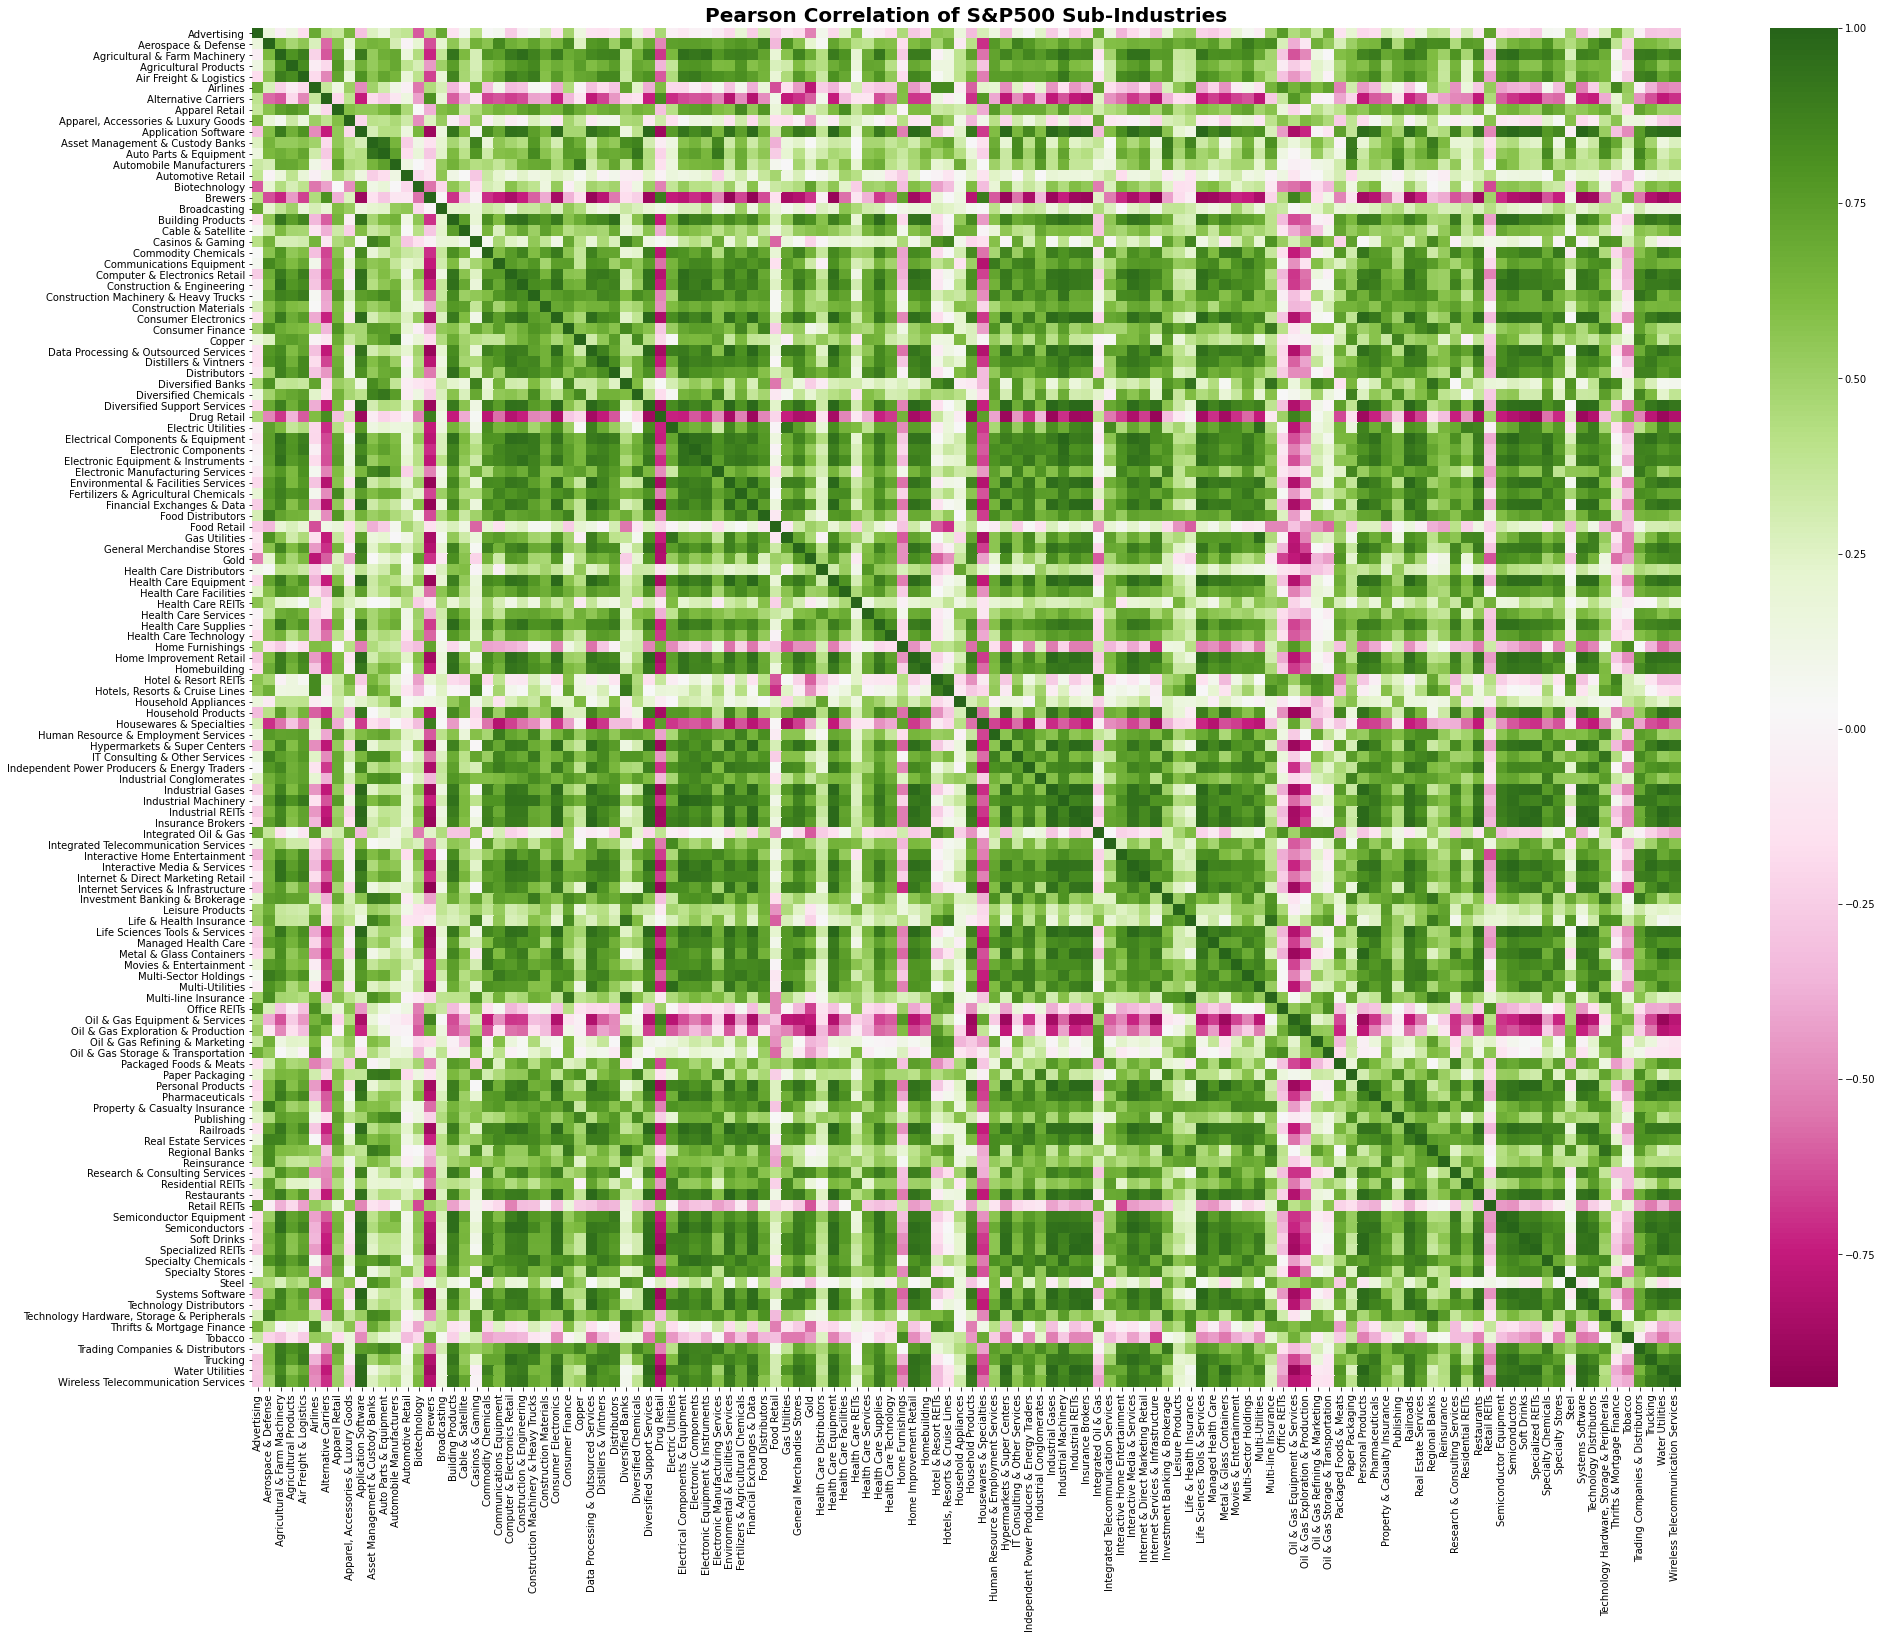

In [4]:
plt.figure(figsize=(32, 25))
plt.title("Pearson Correlation of S&P500 Sub-Industries", size=20, weight="bold")
sns.heatmap(df.corr(), cmap="PiYG", cbar=True)
plt.savefig('output.jpg')